## Project Name: "Exploratory Data Analysis of Coffee Bean Sales"

The goal of this project is to perform a comprehensive exploratory data analysis (EDA) on the Coffee Bean Sales dataset. I aim to:

* **Understand the Data Structure:** 
Identify and understand the key features, data types, and overall structure of the dataset, including orders, customers, and products.
* **Data Cleaning:**
Detect and handle any missing values, duplicates, outliers, and inconsistencies in the data to ensure accuracy and reliability for analysis.
* **Analyze Trends and Patterns:**
Explore relationships and patterns within the data, such as sales trends over time, the popularity of different coffee types, roast levels, and the performance of various product lines.
* **Generate Insights:**
Provide meaningful insights to enhance sales strategies, optimize inventory management, and refine pricing strategies. Focus on understanding product profitability and identifying seasonal demand patterns.

### Step 1. Imports

#### Import packages

In [354]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis and tests
import scipy.stats as stats
from scipy.stats import chi2_contingency

# For decomposing time series into trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### Load Datasets

In [355]:
orders = pd.read_excel('Raw Data.xlsx', sheet_name='orders')
customers = pd.read_excel('Raw Data.xlsx', sheet_name='customers')
products = pd.read_excel('Raw Data.xlsx', sheet_name='products')

#### Merging Datasets

In [356]:
# Merge Orders with Customers on 'Customer ID'
merged = pd.merge(orders, customers, on='Customer ID', how='inner')

In [357]:
# Merge the result with Products on 'Product ID'
sales = pd.merge(merged, products, on='Product ID', how='inner')

### Step 2. Data preparation

#### Data overview

In [358]:
# Display first few rows of the dataset
sales.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0,9.95,0.995,0.597
1,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5,Rosaleen Scholar,rscholarc@nyu.edu,+1 (804) 420-0420,80915 Montana Park,Richmond,United States,23285,No,Rob,M,1.0,9.95,0.995,0.597
2,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6,Hy Zanetto,NaN,NaN,469 Paget Place,Tucson,United States,85715,Yes,Rob,M,1.0,9.95,0.995,0.597
3,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6,Gay Rizzello,grizzello1x@symantec.com,+44 (247) 225-8003,21 Schmedeman Crossing,Liverpool,United Kingdom,L33,Yes,Rob,M,1.0,9.95,0.995,0.597
4,JDS-33440-914,2021-10-28,58511-10548-ZU,R-M-1,3,Ailene Nesfield,anesfield8p@people.com.cn,+44 (418) 372-8139,59 Rieder Lane,Belfast,United Kingdom,BT2,Yes,Rob,M,1.0,9.95,0.995,0.597


In [359]:
# Get basic information about the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Customer Name   1000 non-null   object        
 6   Email           794 non-null    object        
 7   Phone Number    865 non-null    object        
 8   Address Line 1  1000 non-null   object        
 9   City            1000 non-null   object        
 10  Country         1000 non-null   object        
 11  Postcode        1000 non-null   object        
 12  Loyalty Card    1000 non-null   object        
 13  Coffee Type     1000 non-null   object        
 14  Roast Type      1000 non-null   object        
 15  Size 

In [360]:
# Get descriptive statistic about the data
sales.describe(include='all')

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
count,1000,1000,1000,1000,1000.000000,1000,794,865,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,957,NaN,913,48,NaN,913,726,790,913,375,3,593,2,4,3,NaN,NaN,NaN,NaN
top,NOP-21394-646,NaN,86579-92122-OC,A-M-0.5,NaN,Brenn Dundredge,jdymokeje@prnewswire.com,+1 (405) 369-5173,5 Morrow Street,Washington,United States,D17,No,Ara,M,NaN,NaN,NaN,NaN
freq,5,NaN,7,30,NaN,7,5,7,7,26,774,15,521,264,334,NaN,NaN,NaN,NaN
mean,NaN,2020-11-06 21:07:12,NaN,NaN,3.551000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.037300,12.908080,1.438336,1.301375
min,NaN,2019-01-02 00:00:00,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.685000,0.823400,0.161100
25%,NaN,2019-12-17 00:00:00,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,5.370000,1.191400,0.505050
50%,NaN,2020-12-02 12:00:00,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,8.950000,1.366200,0.980100
75%,NaN,2021-10-02 06:00:00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,15.850000,1.650000,1.649100
max,NaN,2022-08-19 00:00:00,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,36.455000,2.377500,4.739150


#### Data cleaning and preprocessing

In [361]:
# Handle missing values
sales.isnull().sum()

Order ID            0
Order Date          0
Customer ID         0
Product ID          0
Quantity            0
Customer Name       0
Email             206
Phone Number      135
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
Coffee Type         0
Roast Type          0
Size                0
Unit Price          0
Price per 100g      0
Profit              0
dtype: int64

We have 206 missing values in 'Email' column and 135 in 'Phone number'. As these columns are not important for our analysis, I will just drop them further.

In [362]:
# Remove duplicates
sales.duplicated().sum()

0

There is no duplicated rows in our dataset.

In [363]:
# Check inconsistent Data Formats
sales.dtypes

Order ID                  object
Order Date        datetime64[ns]
Customer ID               object
Product ID                object
Quantity                   int64
Customer Name             object
Email                     object
Phone Number              object
Address Line 1            object
City                      object
Country                   object
Postcode                  object
Loyalty Card              object
Coffee Type               object
Roast Type                object
Size                     float64
Unit Price               float64
Price per 100g           float64
Profit                   float64
dtype: object

In [364]:
# Check unique values in categorical columns to ensure consistency
print("Unique values in 'Coffee Type':", sales['Coffee Type'].unique())
print("Unique values in 'Roast Type':", sales['Roast Type'].unique())
print("Unique values in 'Country':", sales['Country'].unique())

Unique values in 'Coffee Type': ['Rob' 'Exc' 'Ara' 'Lib']
Unique values in 'Roast Type': ['M' 'L' 'D']
Unique values in 'Country': ['United States' 'United Kingdom' 'Ireland']


In [365]:
# Drop irrelevant columns from the dataset
columns_to_drop = ['Email', 'Phone Number', 'Address Line 1', 'City', 'Postcode']

sales = sales.drop(columns=columns_to_drop)

### Step 3. Univariate analysis

#### Understand the distribution of numerical variables

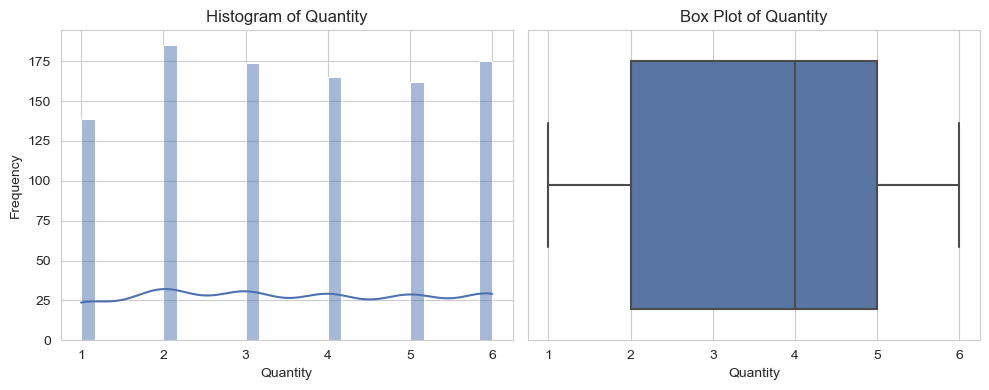

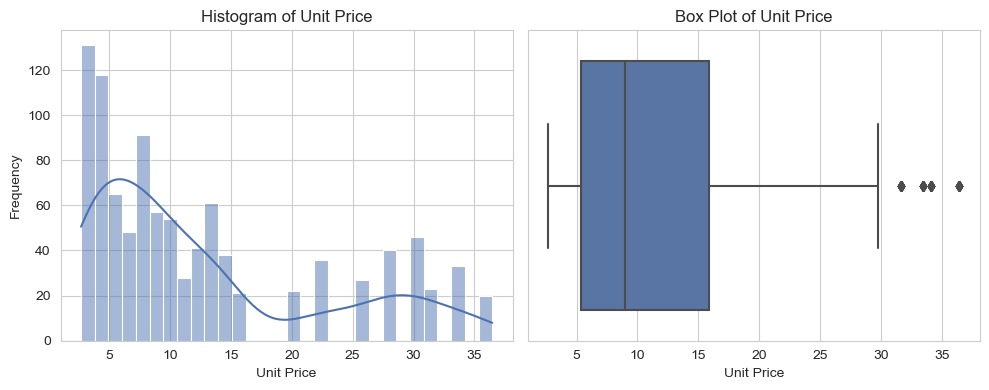

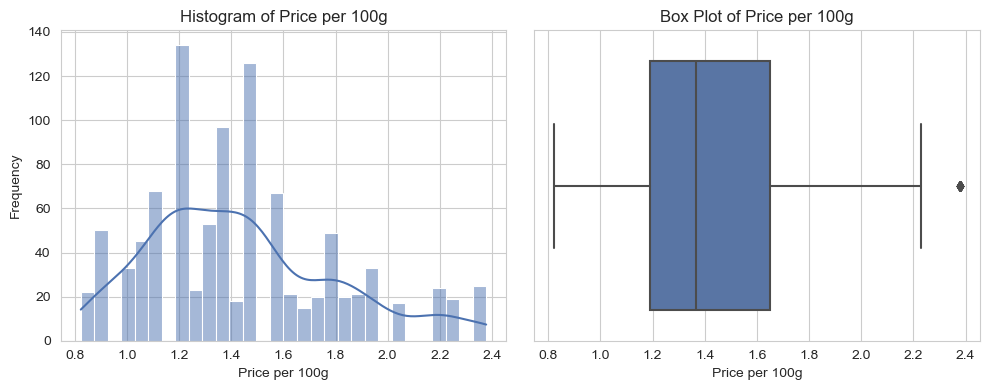

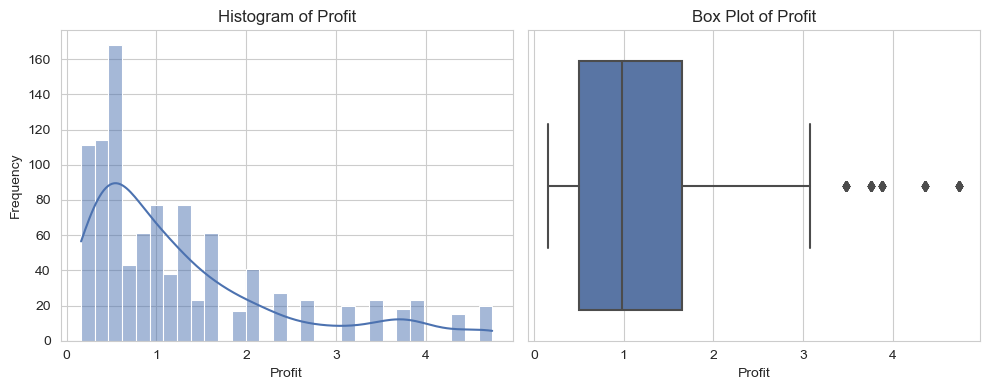

In [366]:
# Numerical columns to analyze
numerical_columns = ['Quantity', 'Unit Price', 'Price per 100g', 'Profit']

for col in numerical_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(sales[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)  
    sns.boxplot(x=sales[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    # Display the plots
    plt.tight_layout()
    plt.show()

The **Quantity** column displays a uniform distribution without any outliers, ishowing a wide range of order sizes throughout the dataset. The other columns (**Unit Price**, **Price per 100g**, and **Profit**) show right-skewed distributions with notable high-value outliers, which may represent special cases such as premium products or high-margin sales.

In [367]:
# Display summary statistics
print("Summary Statistics for Numerical Variables:")
print(sales[numerical_columns].describe())

Summary Statistics for Numerical Variables:
          Quantity   Unit Price  Price per 100g       Profit
count  1000.000000  1000.000000     1000.000000  1000.000000
mean      3.551000    12.908080        1.438336     1.301375
std       1.681733     9.772455        0.365525     1.128052
min       1.000000     2.685000        0.823400     0.161100
25%       2.000000     5.370000        1.191400     0.505050
50%       4.000000     8.950000        1.366200     0.980100
75%       5.000000    15.850000        1.650000     1.649100
max       6.000000    36.455000        2.377500     4.739150


The summary statistics reveal that most orders consist of 3 to 4 items, with a relatively narrow range of sizes. The product prices (Unit Price) vary significantly, while Price per 100g remains more consistent. Most transactions generate modest profits, though there are some high-profit outliers.

#### Distribution fitting

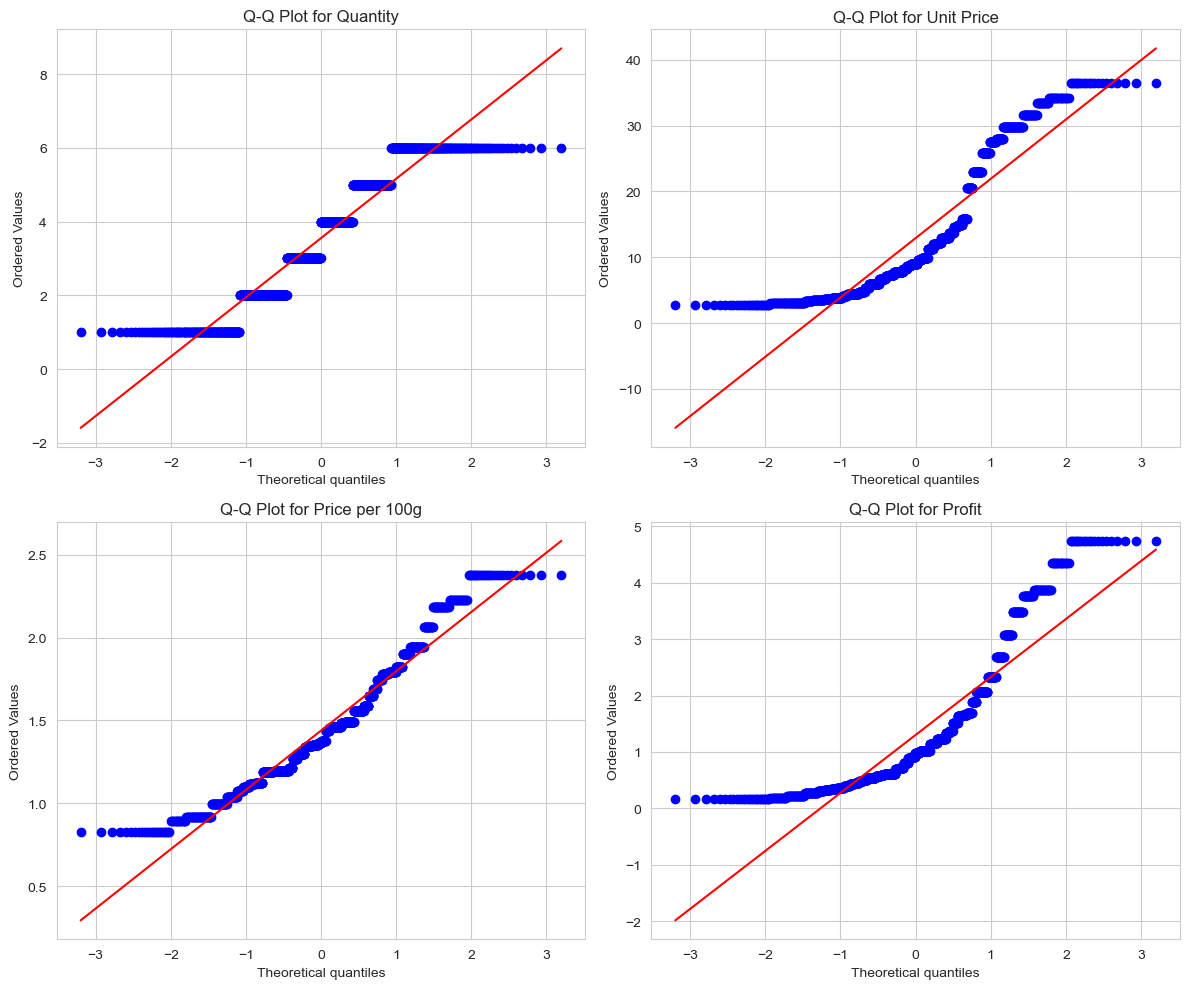

In [368]:
# Q-Q plots to check for normality
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    stats.probplot(sales[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')

plt.tight_layout()
plt.show()

None of the numerical columns (Quantity, Unit Price, Price per 100g, and Profit) follow a normal distribution, suggesting that the data may need transformation or non-parametric methods for statistical analysis. Further investigation of the non-normal characteristics, such as skewness and outliers, might provide additional insights.

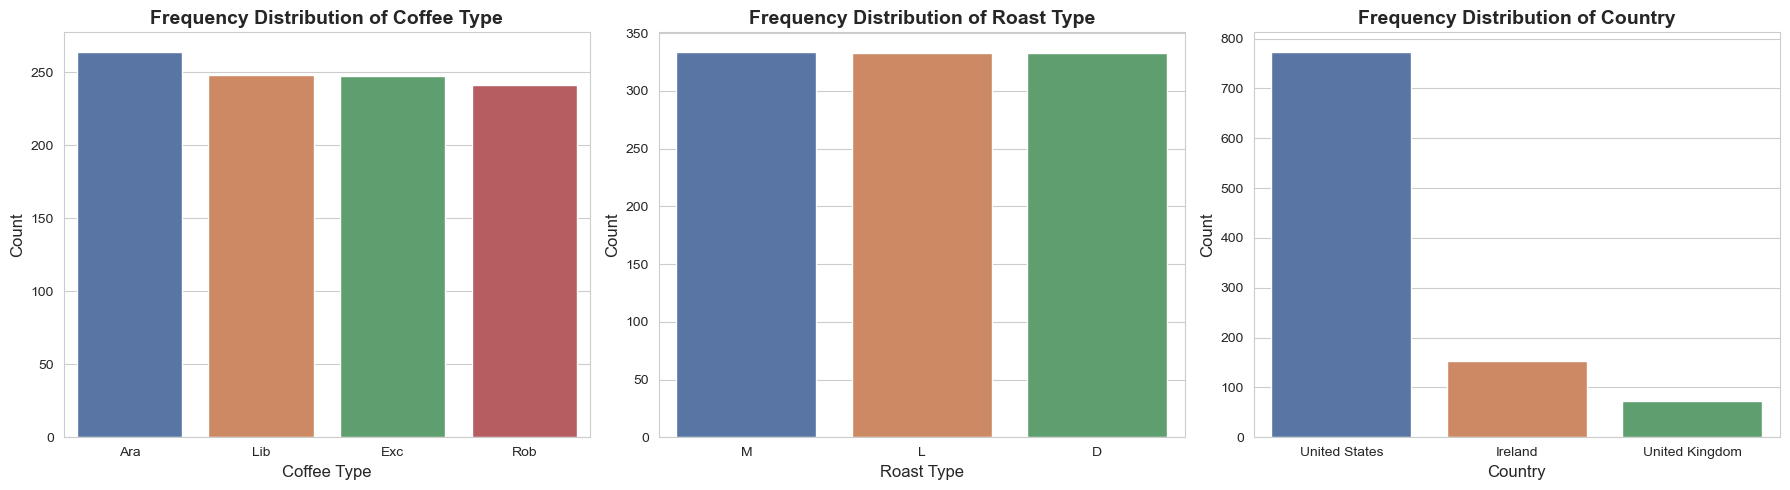

In [369]:
# Categorical columns to analyze
categorical_columns = ['Coffee Type', 'Roast Type', 'Country']

sns.set_palette("deep")
sns.set_style("whitegrid")

# Plot bar plots for categorical variables
plt.figure(figsize=(18,5))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=sales[col], order=sales[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()    
plt.show()

* The most popular coffee type is 'Ara,' with other types being slightly less consumed.
* There is no notable preference for any specific roast type, as they are consumed almost evenly.
* The United States leads in sales, making it the strongest market, while Ireland and the United Kingdom have the fewest orders.

### Step 4. Bivariate analysis

#### Correlation analysis

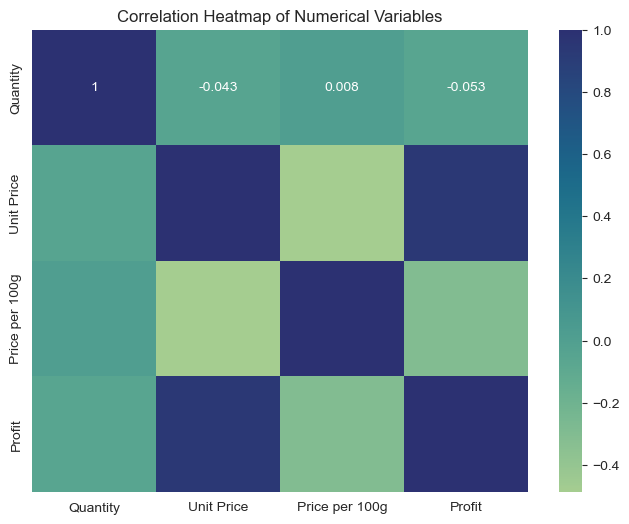

In [370]:
# Calculate the correlation matrix
correlation_matrix = sales[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

* A medium positive correlation between Unit Price and Price per 100g, suggesting that as the unit price increases, the price per 100g also tends to increase.
* A weak correlation between Quantity and other variables, indicating that order size does not strongly relate to price or profit.
* A mild positive correlation between Profit and both Unit Price and Price per 100g, implying that higher-priced items tend to generate slightly more profit.

#### Scatter Plots

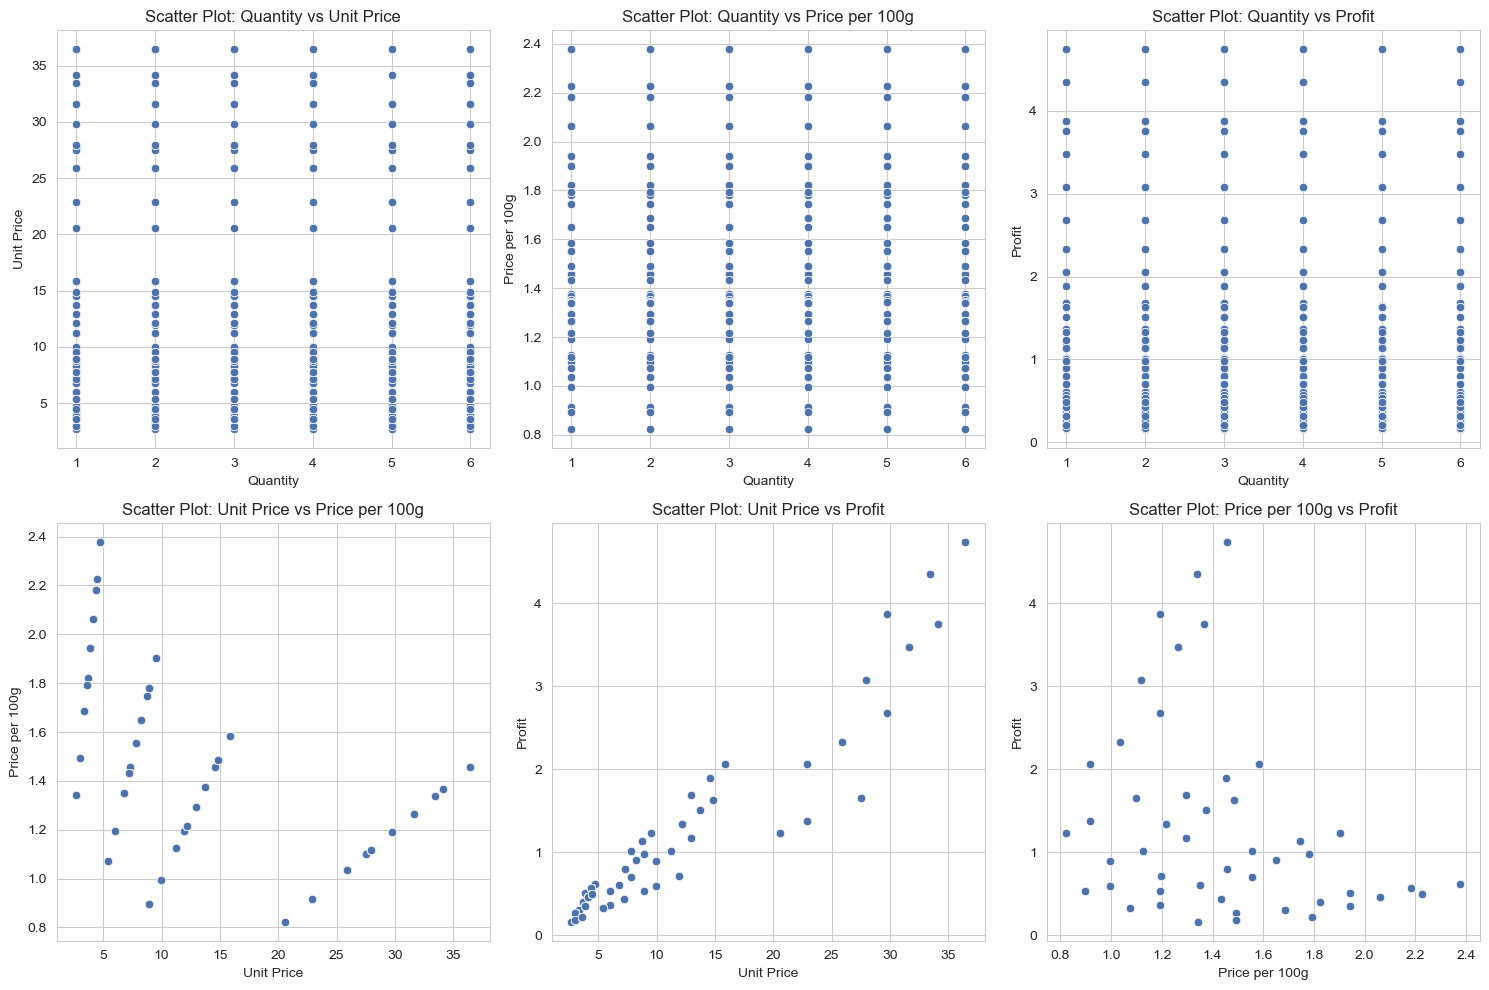

In [371]:
# Create scatter plots for pairs of numerical variables
plt.figure(figsize=(15, 10))

plot_number = 1

for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:
            plt.subplot(2, 3, plot_number)
            sns.scatterplot(x=sales[col1], y=sales[col2])
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plot_number += 1

plt.tight_layout()
plt.show()

* Pairs, such as Quantity with Unit Price, Price per 100g, and Profit, do not show clear linear patterns, suggesting weak or no linear relationships between these variables.
* There is a visible positive trend between Unit Price and Price per 100g, suggesting that as the unit price increases, the price per 100g also tends to increase.
* Both Unit Price and Price per 100g have positive correlations with Profit, suggesting that pricing strategies directly impact profitability. However, the strength of these relationships should be further quantified with correlation coefficients or regression analysis to determine their significance.

#### Cross-tabulations and box plots

In [372]:
# Categorical columns to analyze
cat_columns = ['Coffee Type', 'Roast Type']

In [373]:
# Cross-tabulations
for cat_col in cat_columns:
    crosstab = pd.crosstab(sales[cat_col], sales['Country'])
    print(f'Cross-tabulation between {cat_col} and Country:')
    print(crosstab)
    print('\n')

Cross-tabulation between Coffee Type and Country:
Country      Ireland  United Kingdom  United States
Coffee Type                                        
Ara               41               7            216
Exc               35              23            189
Lib               39              21            188
Rob               38              22            181


Cross-tabulation between Roast Type and Country:
Country     Ireland  United Kingdom  United States
Roast Type                                        
D                66              19            248
L                48              26            259
M                39              28            267




**Coffee Type vs. Country:**
* In the United States, the most popular coffee type is 'Ara' (216 orders), followed closely by 'Exc' (189 orders), 'Lib' (188 orders), and 'Rob' (181 orders).
* In Ireland, the sales are relatively evenly distributed among coffee types, with 'Ara' (41 orders), 'Lib' (39 orders), 'Rob' (38 orders), and 'Exc' (35 orders).
* In the United Kingdom, 'Exc' (23 orders) is the most popular coffee type, followed by 'Rob' (22 orders), 'Lib' (21 orders), and 'Ara' (7 orders).

**Roast Type vs. Country:**
* In the United States, all roast types have similar sales, with 'M' being the most popular (267 orders), followed by 'L' (259 orders) and 'D' (248 orders).
* In Ireland, 'D' (66 orders) is the most popular roast type, followed by 'L' (48 orders) and 'M' (39 orders).
* In the United Kingdom, the roast types are fairly balanced, with 'M' (28 orders), 'L' (26 orders), and 'D' (19 orders).

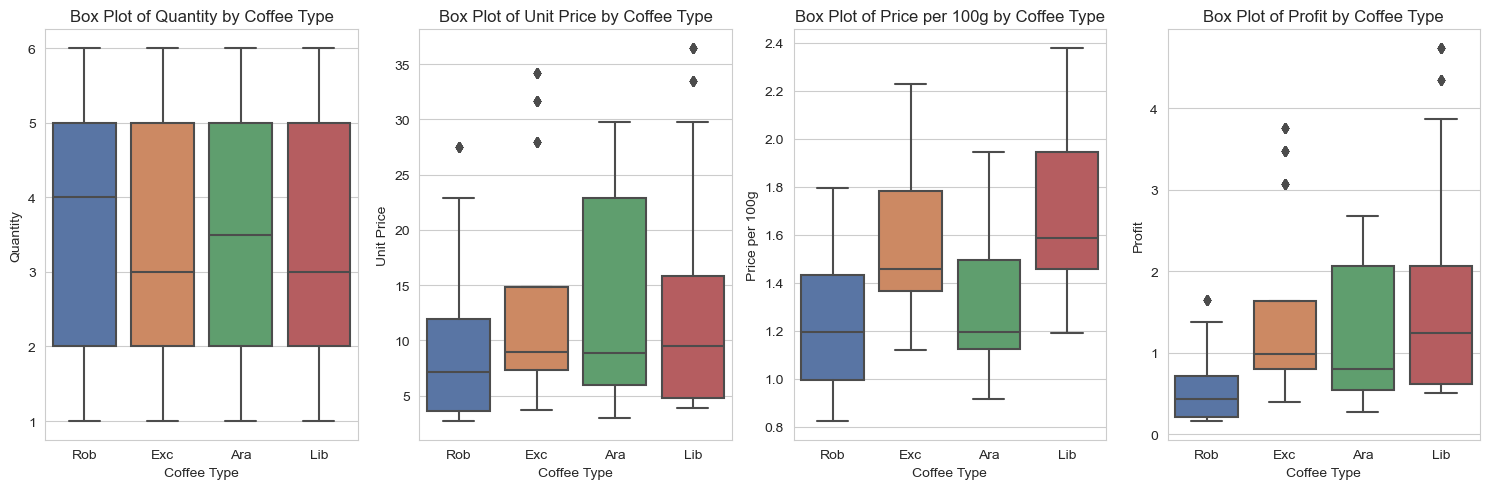

In [374]:
# Box plots to compare the distribution of numerical variables across different categories
plt.figure(figsize=(15,5))
for i, num_col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(x='Coffee Type', y=num_col, data=sales)
    plt.title(f'Box Plot of {num_col} by Coffee Type')
    plt.xlabel('Coffee Type')
    plt.ylabel(num_col)

plt.tight_layout()
plt.show()   

**Quantity by Coffee Type:**
* The median quantity ordered appears consistent across different coffee types, with some variation in the range of quantities, but no significant differences in the central tendency.
  
**Unit Price by Coffee Type:**
* There are noticeable differences in the unit price across coffee types. 'Ara' has a wider range and higher median prices compared to others.

**Price per 100g by Coffee Type:**
* Similar to unit price, the Price per 100g varies across coffee types, with certain types (e.g., 'Ara') showing higher median prices and more variation in price.

**Profit by Coffee Type:**
* The profit distribution shows differences among coffee types, with 'Ara' generally associated with higher profits, while other types have lower and more varied profit margins.

#### Chi-square tests

In [375]:
# Perform Chi-square tests for association between categorical variables
for cat_col1 in cat_columns:
    for cat_col2 in cat_columns:
        if cat_col1 != cat_col2:
            contingency_table = pd.crosstab(sales[cat_col1], sales[cat_col2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            print(f"Chi-square test between {cat_col1} and {cat_col2}:")
            print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")
            print("Expected frequencies:\n", ex)
            print("\n")

Chi-square test between Coffee Type and Roast Type:
Chi2: 4.7541, p-value: 0.5757, Degrees of Freedom: 6
Expected frequencies:
 [[87.912 87.912 88.176]
 [82.251 82.251 82.498]
 [82.584 82.584 82.832]
 [80.253 80.253 80.494]]


Chi-square test between Roast Type and Coffee Type:
Chi2: 4.7541, p-value: 0.5757, Degrees of Freedom: 6
Expected frequencies:
 [[87.912 82.251 82.584 80.253]
 [87.912 82.251 82.584 80.253]
 [88.176 82.498 82.832 80.494]]




The p-value is much greater than 0.05, indicating that there is no statistically significant association between coffee type and roast type. The observed differences could be due to random chance. This suggests that customer preferences for coffee types are not strongly linked to their preferences for roast types.

### Step 5. Multivariate analysis

#### Pair Plot

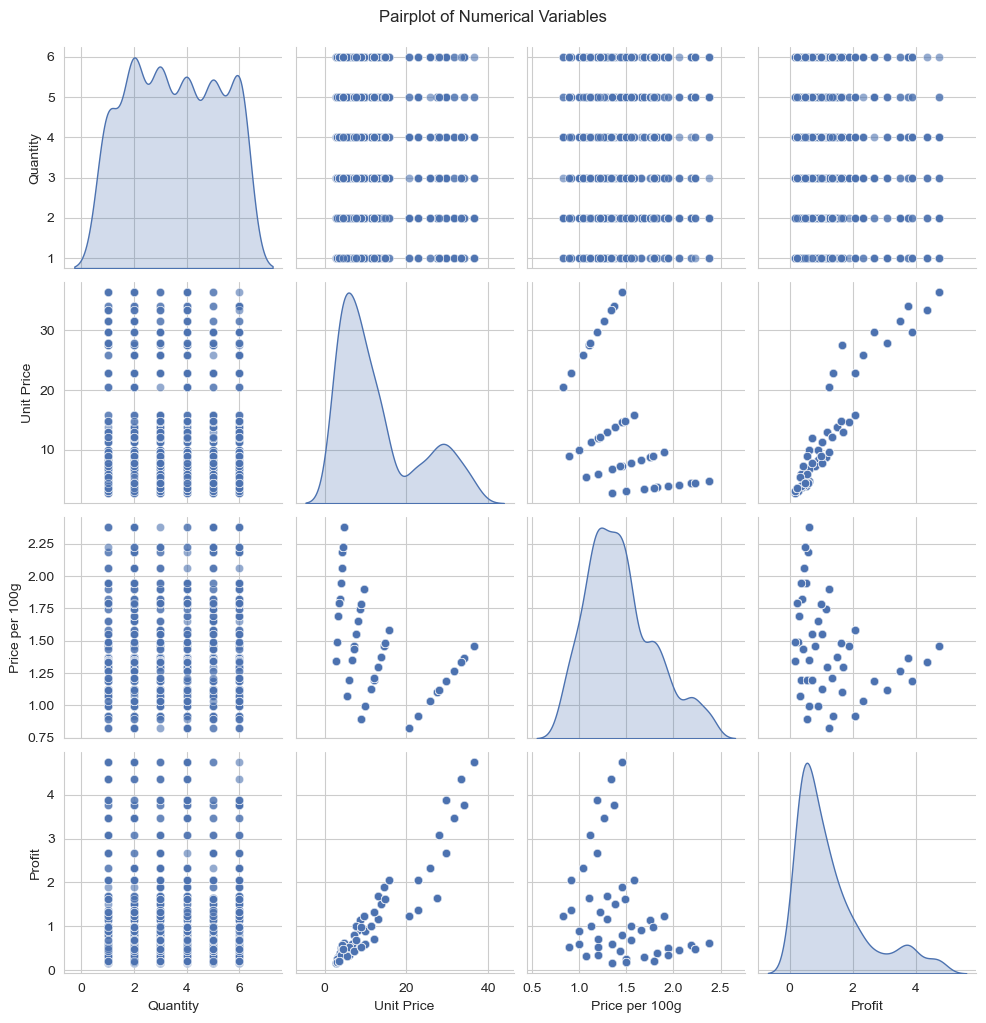

In [376]:
# Pairplot to visualize pairwise relationships
sns.pairplot(sales[numerical_columns], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

The scatter plots show no strong linear relationships between most numerical variables. There is a slight positive trend between Unit Price and Profit, as well as between Price per 100g and Profit, suggesting that higher prices are associated with higher profits. Overall, the variables generally vary independently of each other.

#### Multivariate grouped analysis

In [377]:
# Analyze combined effects of 'Coffee Type', 'Roast Type', and numerical variables
# Group by 'Coffee Type' and 'Roast Type' and calculate the mean of numerical variables
grouped_analysis = sales.groupby(['Coffee Type', 'Roast Type'])[numerical_columns].mean().reset_index()

print("Grouped Analysis - Mean of Numerical Variables by Coffee Type and Roast Type:")
print(grouped_analysis)

Grouped Analysis - Mean of Numerical Variables by Coffee Type and Roast Type:
   Coffee Type Roast Type  Quantity  Unit Price  Price per 100g    Profit
0          Ara          D  3.616279    9.707035        1.185901  0.873633
1          Ara          L  3.564103   14.610256        1.471983  1.314923
2          Ara          M  3.580000   12.667500        1.252575  1.140075
3          Exc          D  3.414634   12.505610        1.410585  1.375617
4          Exc          L  3.938272   15.015000        1.717100  1.651650
5          Exc          M  3.250000   15.321429        1.552768  1.685357
6          Lib          D  3.282353   14.214529        1.468073  1.847889
7          Lib          L  3.528736   15.868218        1.860098  2.062868
8          Lib          M  3.526316   13.535329        1.738342  1.759593
9          Rob          D  3.575000    9.308000        1.061022  0.558480
10         Rob          L  3.747126   12.032414        1.401034  0.721945
11         Rob          M  3.59459

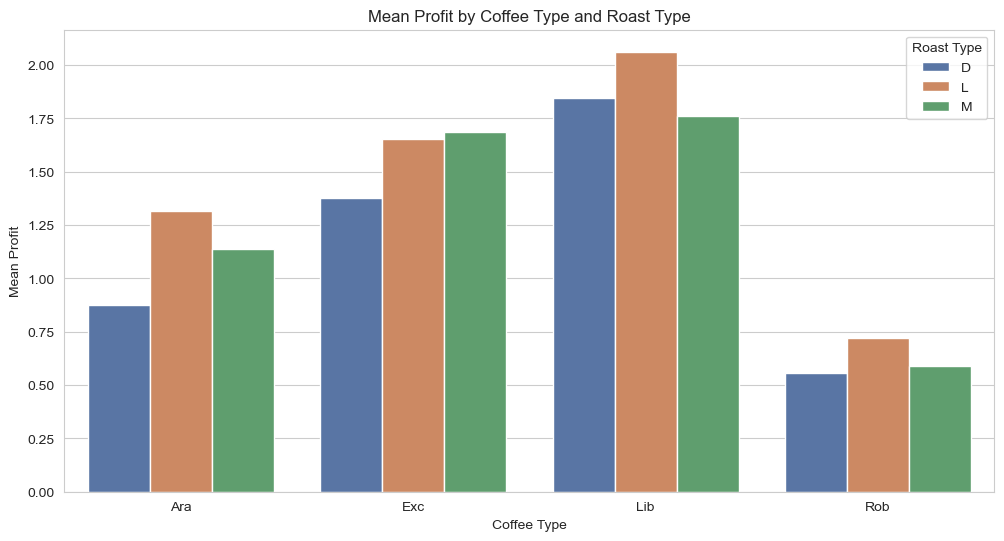

In [378]:
# Visualize grouped analysis
plt.figure(figsize=(12,6))
sns.barplot(x='Coffee Type', y='Profit', hue='Roast Type', data=grouped_analysis)
plt.title('Mean Profit by Coffee Type and Roast Type')
plt.xlabel('Coffee Type')
plt.ylabel('Mean Profit')
plt.legend(title='Roast Type')
plt.show()

* 'Lib' generally shows the highest profits, especially with L roast type.
* 'Ara' and 'Exc' have varied pricing and profit margins, with L roasts typically yielding higher profits.
* 'Rob' consistently has lower prices and profits across all roast types, indicating a different market positioning.

### Step 6. Outlier detection

#### Visualize outliers

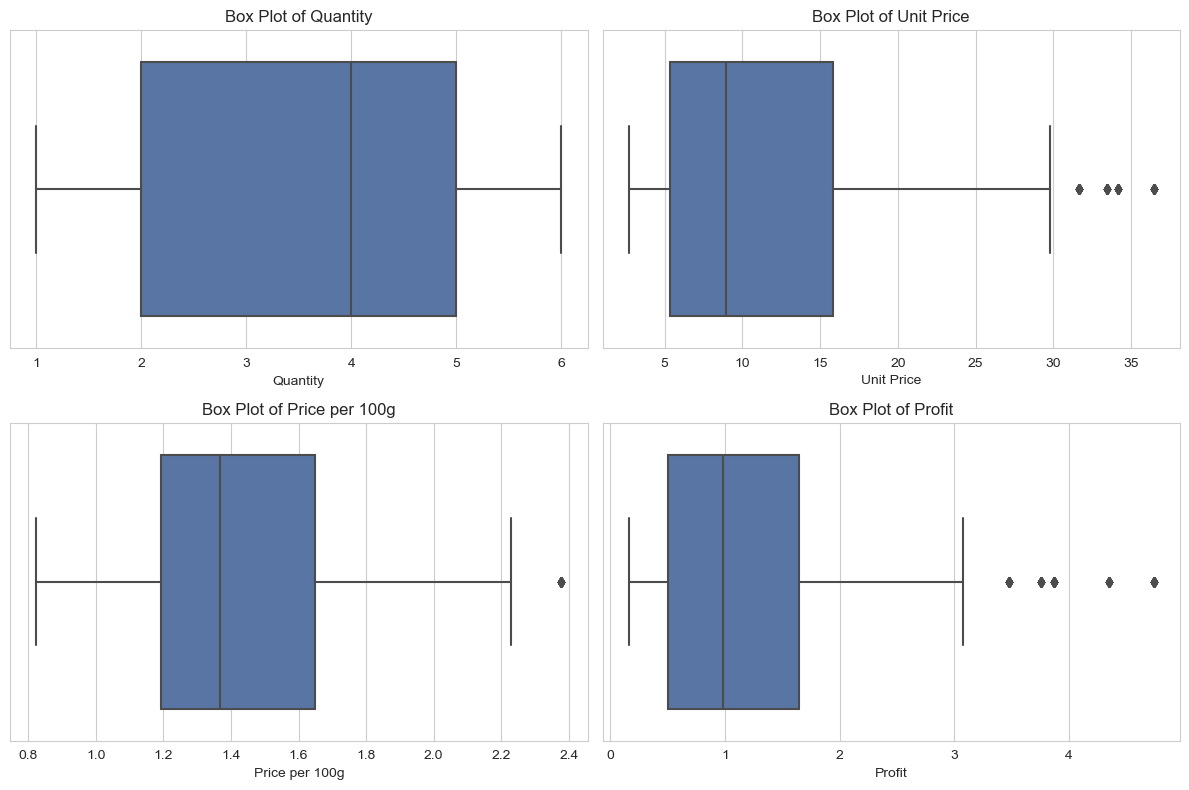

In [379]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=sales[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

**Quantity:**
The box plot shows no significant outliers, indicating that the quantities are fairly consistent across the dataset.

**Unit Price:**
There are several outliers on the higher end of the price range, suggesting that some products are priced significantly above the typical range.

**Price per 100g:**
The box plot indicates a few outliers on the higher side, similar to Unit Price, meaning certain products are more expensive per 100g than most others.

**Profit:**
There are numerous outliers at the higher end of the profit range, indicating that a few transactions generate significantly more profit compared to the majority.

#### Quantify Outliers

#### IQR Method

In [380]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    num_outliers = outliers.shape[0]

    print(f"Column: {col}")
    print(f"Lower_limit: {lower_limit}")
    print(f"Upper_limit: {upper_limit}")
    print(f"Number of outliers: {num_outliers}\n")

# Apply the function to each numerical column
for col in numerical_columns:
    detect_outliers_iqr(sales, col)

Column: Quantity
Lower_limit: -2.5
Upper_limit: 9.5
Number of outliers: 0

Column: Unit Price
Lower_limit: -10.350000000000001
Upper_limit: 31.57
Number of outliers: 76

Column: Price per 100g
Lower_limit: 0.5034999999999996
Upper_limit: 2.3379000000000003
Number of outliers: 25

Column: Profit
Lower_limit: -1.2110249999999996
Upper_limit: 3.3651749999999994
Number of outliers: 99



#### Z-Score Method

In [381]:
# Function to detect outliers using the Z-score method and provide summary
def zscore_outliers_summary(data, col, threshold=3):
    z_scores = np.abs(stats.zscore(data[col].dropna()))
    lower_limit = data[col].mean() - threshold * data[col].std()
    upper_limit = data[col].mean() + threshold * data[col].std()
    num_outliers = (z_scores > threshold).sum()
    
    print(f"Column: {col}")
    print(f"Lower_limit: {lower_limit}")
    print(f"Upper_limit: {upper_limit}")
    print(f"Number of outliers: {num_outliers}\n")

# Apply the function to each numerical column
for col in numerical_columns:
    zscore_outliers_summary(sales, col)

Column: Quantity
Lower_limit: -1.4942001987081754
Upper_limit: 8.596200198708175
Number of outliers: 0

Column: Unit Price
Lower_limit: -16.409286115979413
Upper_limit: 42.22544611597941
Number of outliers: 0

Column: Price per 100g
Lower_limit: 0.34176099733806287
Upper_limit: 2.5349104026619367
Number of outliers: 0

Column: Profit
Lower_limit: -2.0827806742591397
Upper_limit: 4.685530774259139
Number of outliers: 20



In [382]:
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(sales[numerical_columns])

# Add LOF outliers to the DataFrame
sales['Outlier_LOF'] = outliers_lof

# Function to summarize outliers detected by LOF method for each numerical column
def lof_outliers_summary(data, cols):
    for col in cols:
        data_subset = data[[col]].copy()
        lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
        outliers = lof.fit_predict(data_subset)
        
        # Count the number of outliers
        num_outliers = (outliers == -1).sum()

        # Output format similar to the provided example
        print(f"Column: {col}")
        print(f"Number of outliers: {num_outliers}\n")

# Apply the summary function to each numerical column
lof_outliers_summary(sales, numerical_columns)

Column: Quantity
Number of outliers: 0

Column: Unit Price
Number of outliers: 50

Column: Price per 100g
Number of outliers: 46

Column: Profit
Number of outliers: 38



* The IQR method identifies more outliers in Unit Price and Profit than the other methods.
* The Z-score method is more conservative, detecting fewer outliers, particularly in Profit.
* The LOF method identifies moderate numbers of outliers across most variables.

### Step 7. Time Series Analysis

#### Resample and Aggregate Data

In [383]:
# Set 'Order Date' as the index
sales.set_index('Order Date', inplace=True)
# Resample data to monthly, weekly and daily frequency
monthly_data = sales.resample('M').sum()
weekly_data = sales.resample('W').sum()

#### Visualize Trends Over Time

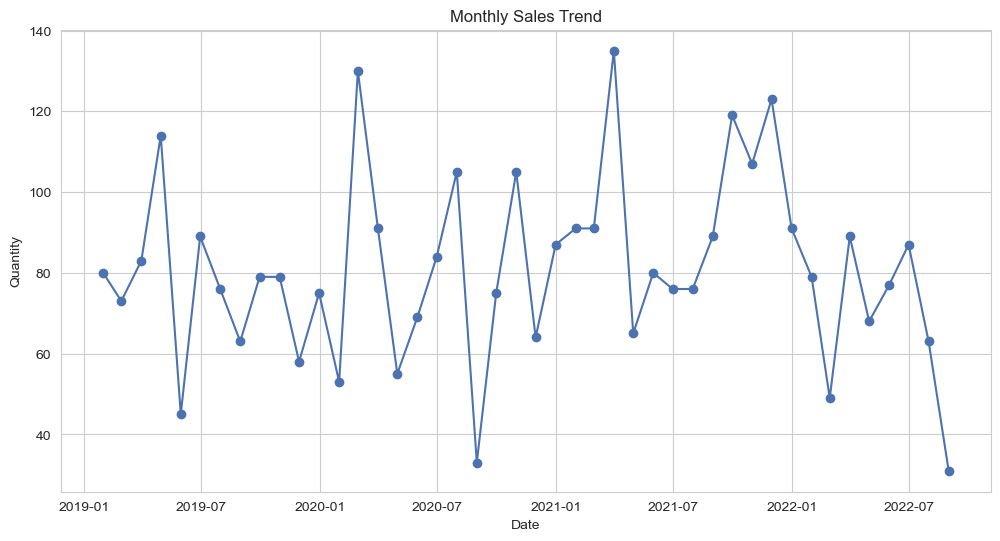

In [384]:
# Plot the resampled monthly data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Quantity'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

**Monthly Sales Fluctuations:**
* There are noticeable fluctuations in sales volumes across different months, which could indicate seasonal demand variations or the impact of marketing campaigns.

**Peaks and Dips:**
* The chart shows periods of high and low sales, which may suggest the influence of external factors (e.g., holidays, promotions, or sales events).

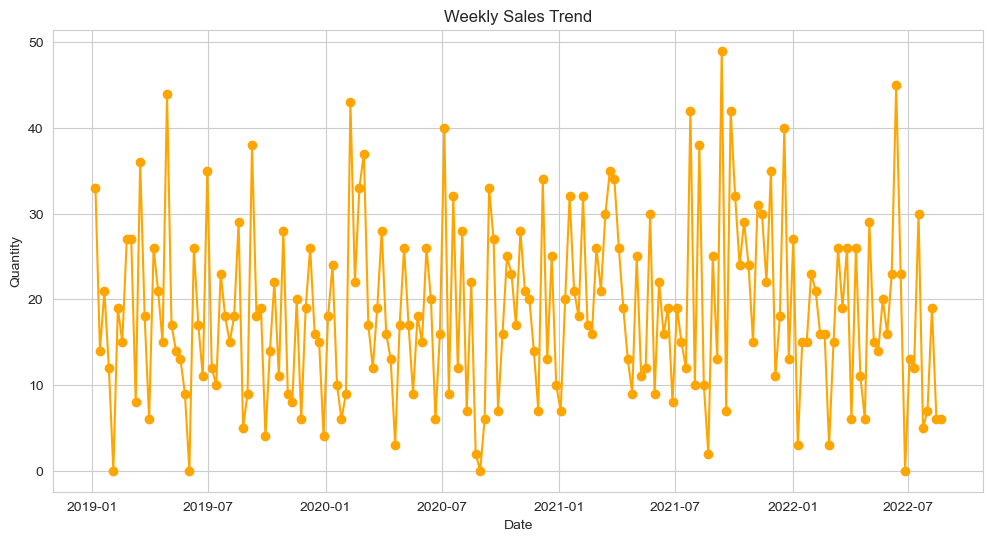

In [385]:
# Plot the resampled weeekly data
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Quantity'], marker='o', linestyle='-', color='orange')
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

#### Decompose Time Series

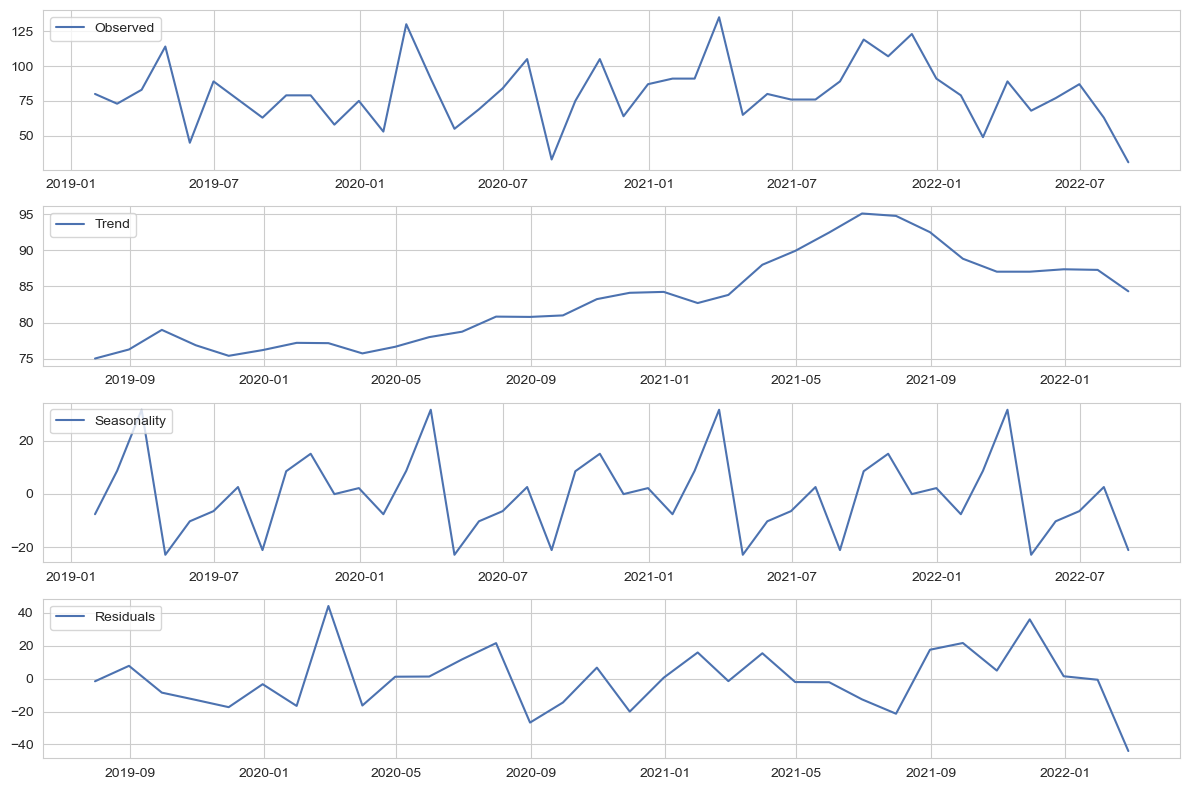

In [386]:
# Decompose the monthly data
decomposition = seasonal_decompose(monthly_data['Quantity'], model='additive')

# Plot decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

* **Trend:** The trend shows a steady increase in sales over time, suggesting growing demand or the success of recent sales strategies.
* **Seasonality:** There are consistent peaks in sales during specific months, indicating a seasonal effect, such as increased sales during holidays or specific promotions.
* **Residuals:** The residuals plot reveals sudden spikes or drops, which could correspond to market disruptions, special events, or potential data errors that require further investigation.

### Key Insights

* Sales are steadily increasing over time, indicating growing demand or effective sales strategies.
* Sales show consistent peaks during specific months, suggesting seasonal demand, likely linked to holidays or promotions.
* 'Lib' coffee type, especially with the 'L' roast, has the highest profits. In contrast, 'Rob' has lower prices and profits, indicating different market positioning.
* The U.S. is the strongest market, with 'Ara' being the most popular coffee type. Preferences for other coffee types vary by country.
* Higher-priced items tend to yield slightly more profit, indicating that pricing strategy directly impacts profitability.
* There are significant outliers in Unit Price, Price per 100g, and Profit, which may represent special cases or data anomalies.

### Recommendations

* Adjust pricing strategies to focus on higher-priced items, particularly 'Lib' with 'L' roast, to maximize profits.
* Focus marketing efforts on the U.S. market and promote the popular 'Ara' coffee type. Explore opportunities to increase sales in Ireland and the UK by tailoring product offerings to local preferences.
* Align promotions with identified seasonal peaks to maximize sales during high-demand periods.
* Investigate detected outliers to determine if they represent data entry errors, special cases, or significant trends. Adjust analysis or business strategies accordingly.